In [8]:
from diffusers import StableDiffusionPipeline
import torch

In [4]:
device = "cuda"

In [114]:
# load model

model_path = "diffusers/outputs/cartoonStyleClassic_v1.safetensors"

In [78]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("nitrosocke/classic-anim-diffusion")

/opt/conda/envs/zero123/lib/python3.9/site-packages/huggingface_hub/file_download.py:1006: UserWarning: Not enough free disk space to download the file. The expected file size is: 0.00 MB. The target location /root/.cache/huggingface/hub only has 0.00 MB free disk space.
  warnings.warn(
/opt/conda/envs/zero123/lib/python3.9/site-packages/huggingface_hub/file_download.py:1006: UserWarning: Not enough free disk space to download the file. The expected file size is: 0.00 MB. The target location /root/.cache/huggingface/hub/models--nitrosocke--classic-anim-diffusion/blobs only has 0.00 MB free disk space.
  warnings.warn(
safety_checker/model.safetensors not found
Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]/opt/conda/envs/zero123/lib/python3.9/site-packages/huggingface_hub/file_download.py:1006: UserWarning: Not enough free disk space to download the file. The expected file size is: 492.31 MB. The target location /root/.cache/huggingface/hub only has 0.00 MB free disk space.

In [115]:
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    safety_checker=None,
    feature_extractor=None,
    requires_safety_checker=False
)

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  5.23it/s]


In [117]:
# load lora weights
pipe.unet.load_attn_procs(model_path)
# set to use GPU for inference
pipe.to(device)

OSError: We couldn't connect to 'https://huggingface.co' to load this model, couldn't find it in the cached files and it looks like diffusers/outputs/cartoonStyleClassic_v1.safetensors is not the path to a directory containing a file named pytorch_lora_weights.bin or 
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/diffusers/installation#offline-mode'.

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:05<00:00,  5.33it/s]


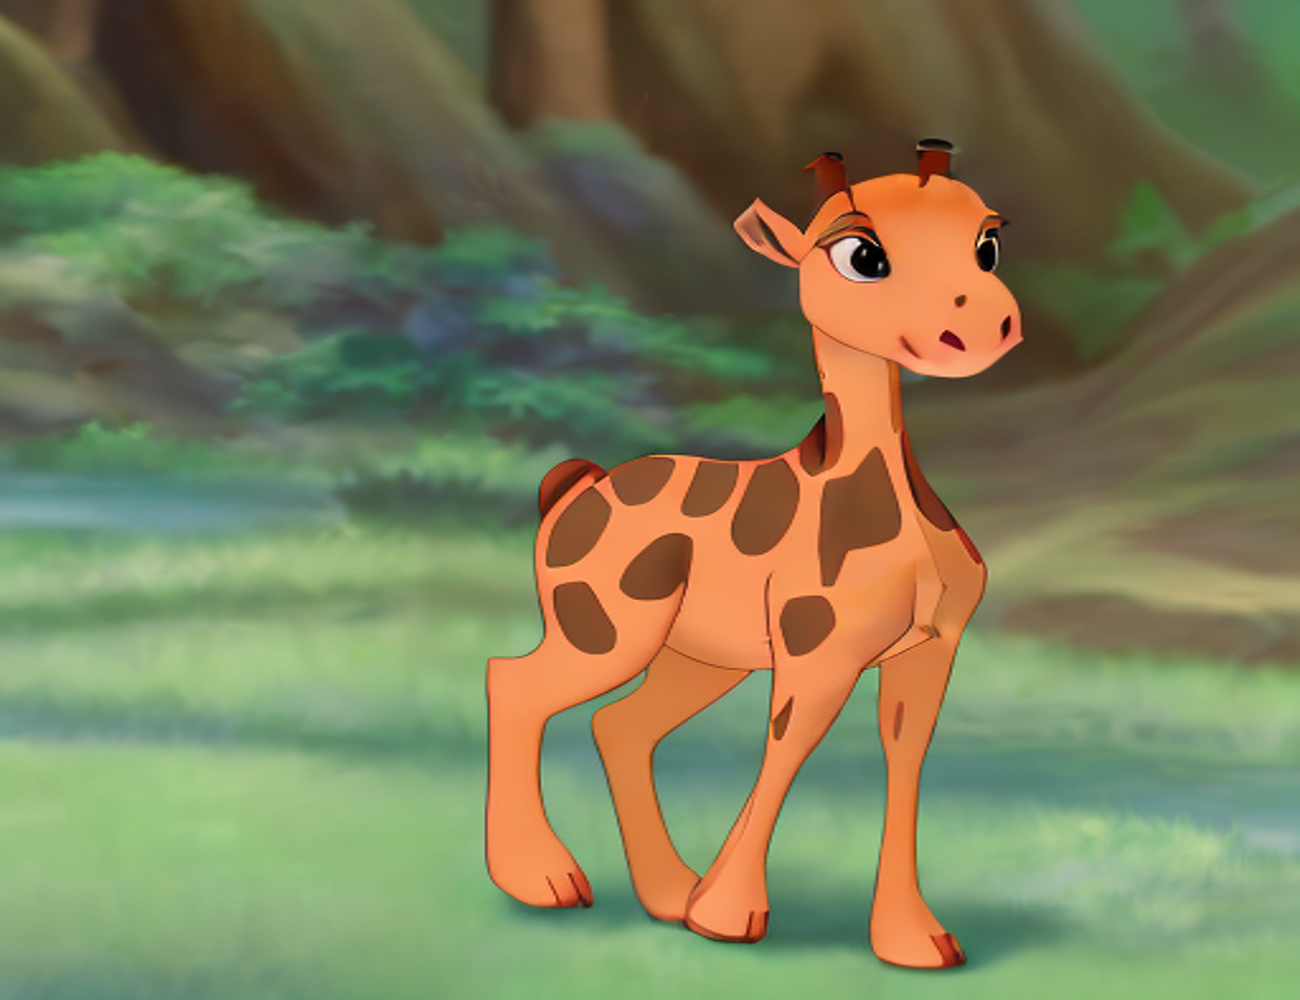

In [113]:
# generate image
prompt = "classic disney style giraffe pokemon with blue eyes. and the background is forest.And I hope there is a background where giraffes are located on the left side of the image and big trees are located on the right side of the image"
image = pipeline(prompt, num_inference_steps=30).images[0]
# save image

desired_size = (1300, 1000)  # 원하는 크기 설정
resized_image = image.resize(desired_size)

resized_image.save("image.png")

resized_image

100%|██████████| 30/30 [00:01<00:00, 16.37it/s]


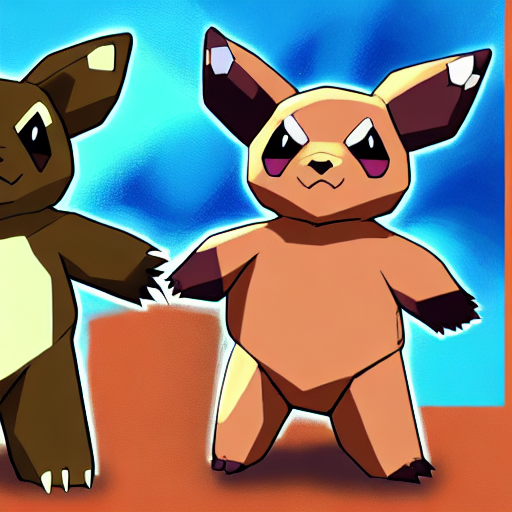

In [74]:
# generate image
prompt = "bear pokemon with a 2d style"
image = pipe(prompt, num_inference_steps=30).images[0]
# save image
image.save("image.png")

image